<a href="https://colab.research.google.com/github/Mark12481632/Imperial_MSc_Project/blob/main/code/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Module 2 of the MSc Project.

My research project is intending to use a Graphical Neural Network (GNN) to predict the solubility, in water, of small organic molecules.
<BR><BR>

The ESOL dataset: https://moleculenet.org/datasets-1, has been identified as a suitable source of data for this project.  It consists of the measured solubility of 1128 small organic molecules - if this is not enough data I may need to supplement this but can't know this until the GNN training stage.  The information in this dataset will need to be transformed into a format suitable for a GNN - i.e. a graph.
<BR><BR>
The analysis and transformation of the "small organic molecule" dataset will require specific packages:

1.   **RDKit (details:https://www.rdkit.org/docs/index.html)**<BR>
     The RDKit is an open-source cheminformatics toolkit written in C++ that is also useable from Java or Python. It includes a collection of standard cheminformatics functionality for molecule I/O, substructure searching, chemical reactions, coordinate generation (2D or 3D), and fingerprinting.
2.   **Pytorch-Geometric (details: https://pytorch-geometric.readthedocs.io/en/latest/)**<BR>
     This is a library built upon PyTorch to easily write and train Graph Neural Networks (GNNs) for a wide range of applications related to structured data.

<BR>

This script and the dataset(s) used can be found in the following github repository: https://github.com/Mark12481632/Imperial_MSc_Project.git. Review the "README" file for guidance.
<BR><BR>

This script is comprised of the following sections: 
1.   Installation of the required packages.
2.   Loading and examining the ESOL dataset.
3.   RDKit usage
4.   Data validation checks on the ESOL dataset.
5.   Initial analysis of the ESOL dataset.
6.   Creation of the output dataset needed fro the GNN.
7.   Summary.

<BR>

**This script was run in Google's Colab environment.**





---


**Section 1: Installation of the required packages.**

One of the reasons I used Google's Colab for running this script was because I had problems installing RDKit on my Apple PC.  I was lucky enough to find guidance for its installation in Colab on the Internet.
<BR><BR>

As a prerequisite for RDKit Condacolab was needed.

<BR>

"%%capture" is used to suppress cell output as this can be large.


In [3]:
%%capture

# Install CONDACOLAB
!pip install -q condacolab
import condacolab
condacolab.install()

In [4]:
%%capture

# Install RDKIT
!conda install -c rdkit rdkit

In [5]:
%%capture

# Install pytorch-geometric
!pip install torch_geometric



---


**Section 2: Loading and examining the ESOL dataset**<BR>

- The ESOL dataset has already been loaded into the github repository - we
  can load it using Pandas.
- Remove the column "ESOL predicted log solubility in mols per litre" as this is the result of another regression model.
<BR><BR>

The column descriptions follow:

1.   Compound ID:<BR>
     Name of the compund.
2.   ESOL predicted log solubility in mols per litre:<BR>
     Predicted solubility using regression model - we will remove this.
3.   Minimum Degree:<BR>
4.   Molecular Weight:<BR>
5.   Number of H-Bond Donors:<BR>
6.   Number of Rings:<BR>
7.   Number of Rotatable Bonds:<BR>
8.   Polar Surface Area:<BR>
9.   measured log solubility in mols per litre:<BR>
10.  smiles:<BR>



In [6]:
# Load the "ESOL" dataset and show attributes.

import pandas as pd

github_esol_url = "https://raw.githubusercontent.com/Mark12481632/Imperial_MSc_Project/main/chem_data/esol_raw.csv"
esol_data = pd.read_csv(github_esol_url)

# Display sample from data:
esol_data.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [7]:
# Remove column "ESOL predicted log solubility in mols per litre"
del esol_data['ESOL predicted log solubility in mols per litre']
esol_data.head()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1




---


**Section 3: Using RDKit**

In this section we demonstrate some of the functionality provided by the RDKIT package.
1.   Use RDKit to display molecules in 2D structure
2.   Use RDKit to check for valid molecules.
3.   Use RDKit to determine molecule length.
4.   Use RDKit to search for similar molecule substructures.

NOTE: This is not a tutorial on RDKit but just demonstrating what it can do and how it can be used in the future.



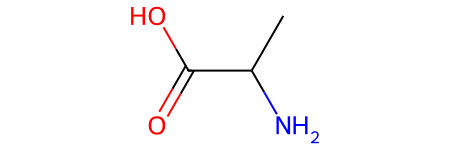

In [8]:
# 1. Display molecule in 2D structure

from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d


def draw2D(m, disp_h=450, disp_w=150):
  """
  This is a simple function that displays a SMILES format molecule
  as a 2D structure
  """
  molSize=(disp_h, disp_w) 
  mc = Chem.Mol(m.ToBinary())
  if not mc.GetNumConformers():
    rdd.Compute2DCoords(mc)
  drawer = draw2d.MolDraw2DSVG(molSize[0], molSize[1])
  drawer.DrawMolecule(mc)
  drawer.FinishDrawing()
  svg = drawer.GetDrawingText()
  display(SVG(svg.replace('svg:', '')))


# load an example SMILES molecule
example_molecule = Chem.MolFromSmiles('CC(N)C(=O)O')

# Display molecule
draw2D(example_molecule)

In [9]:
# 2a. Check invalid molecule.

#   Invalid molecules create a "SMILES Parse Error" as shown below.
#   Also, the object returned for an invalid molecule in None.
invalid_smiles_molecule = 'CO(C)C'                # Such a molecule can't exist
print(Chem.MolFromSmiles(invalid_smiles_molecule))

None


[14:42:32] Explicit valence for atom # 1 O, 3, is greater than permitted


In [10]:
# 2b. Check valid molecule.

#   Valid molecules create no error messages as shown below.
#   Also, the object returned for a valid molecule in not None.
valid_smiles_molecule = 'O'                   # This is the water molecule.
print(Chem.MolFromSmiles(valid_smiles_molecule))


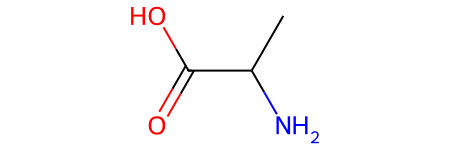

Molecule length: 6


In [11]:
# 3. Determine molecule length

# load an example SMILES molecule
example_molecule = Chem.MolFromSmiles('CC(N)C(=O)O')

draw2D(example_molecule)

# Determine number of atoms (=molecule length), excludes H atoms.
print("Molecule length:", example_molecule.GetNumAtoms())

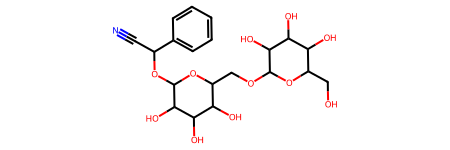

((0,), (21,), (23,), (25,), (27,), (29,), (31,))

In [12]:
# 4. Substructure searches makes use of SMARTS (ref:https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)
#    a Language for Describing Molecular Patterns.

OH_search_pattern = Chem.MolFromSmarts('[OH]')   # Looking for OH group
molecule = Chem.MolFromSmiles('OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O')

draw2D(molecule)

# Should find 7 positional matches
molecule.GetSubstructMatches(OH_search_pattern)



---


**Section 4: Data validation checks on the ESOL dataset.**<BR>

Here we perform the usual sanity checks on the data:

1.   Check for None (i.e. missing) values and types
2.   Check for outlier values.



In [13]:
# ESOL data already loaded into the Pandas DF: esol_data

# 1. Check for missing values - and types.
esol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB


In [28]:
# Look at correlations:

esol_temp = esol_data[['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings',
                       'Number of Rotatable Bonds', 'Polar Surface Area',
                       'measured log solubility in mols per litre']]

esol_temp.corr()

# As one would expect, the size of a molecule is directly related to the "Molecular Weight", also the
# "Number of Rings" and "Polar Surface Area" - so these 3 attributes are highly positively correlated.
# These 3 attributes have a strong negative correlation to the "measured log solubility in mols per litre".
# This relates to section 5 - see below.

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
Minimum Degree,1.000000,-0.096719,-0.130664,0.246020,-0.175626,-0.189464,-0.130445
Molecular Weight,-0.096719,1.000000,0.254877,0.652521,0.396894,0.475440,-0.640189
Number of H-Bond Donors,-0.130664,0.254877,1.000000,0.211087,0.077002,0.755932,0.209429
Number of Rings,0.246020,0.652521,0.211087,1.000000,-0.136654,0.308606,-0.512279
Number of Rotatable Bonds,-0.175626,0.396894,0.077002,-0.136654,1.000000,0.286723,-0.244256
Polar Surface Area,-0.189464,0.475440,0.755932,0.308606,0.286723,1.000000,0.123210
measured log solubility in mols per litre,-0.130445,-0.640189,0.209429,-0.512279,-0.244256,0.123210,1.000000


<Axes: >

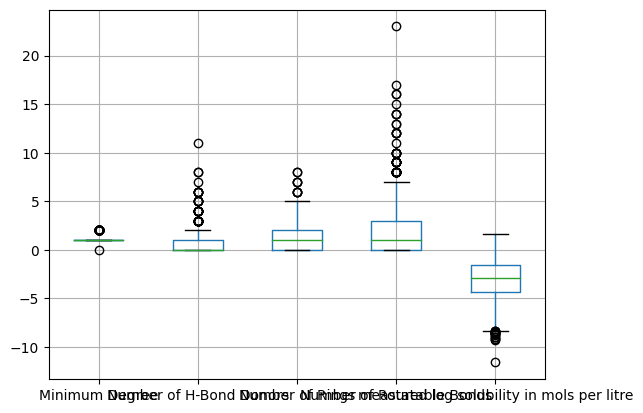

In [24]:
# 2. Check for outliers:
edf_temp = esol_data[['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings',
                      'Number of Rotatable Bonds', 'Polar Surface Area',
                      'measured log solubility in mols per litre']]

edf_temp.describe()
#edf_temp.boxplot()

# All columns appear to be in valid ranges.
# I.e. there appears to be no obvious outliers.



---


**Section 5: Initial analysis of the ESOL dataset.**<BR>

Here we do a more detailed analysis of the dataset.
<BR><BR>

It should be noted that, in a polar medium like water, solubility is affected by two factors:

1.   Molecule length: generally the longer the molecule the less soluble it is.
2.   Polarizing radicals/atoms:  when present cause the hydrocarbon molecule to be polarized and have a greater tendency for solubility.<BR>
In particular we consider the presence of the "OH" radical.
<BR>

Let's examine how this applies to the small molecules we are dealing with.

In [15]:
# Extract the SMILES information and enrich the dataset with information
# on the molecule length and if it is polar - i.e. has the OH radical.

# Extract the SMILES and solubility data
df = esol_data[['smiles', 'measured log solubility in mols per litre']]

# Add the molecule length:
df['mol_len'] = df[['smiles']].applymap( lambda mol: Chem.MolFromSmiles(mol).GetNumAtoms() )

# Add indicator that "OH" is present.
df['has_OH'] = df[['smiles']].applymap(lambda mol: Chem.MolFromSmiles(mol).GetSubstructMatches(OH_search_pattern))

df

<ipython-input-15-c4fcae5974dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mol_len'] = df[['smiles']].applymap( lambda mol: Chem.MolFromSmiles(mol).GetNumAtoms() )
<ipython-input-15-c4fcae5974dc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_OH'] = df[['smiles']].applymap(lambda mol: Chem.MolFromSmiles(mol).GetSubstructMatches(OH_search_pattern))


,smiles,measured log solubility in mols per litre,mol_len,has_OH
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770,32,"((0,), (21,), (23,), (25,), (27,), (29,), (31,))"
1,Cc1occc1C(=O)Nc2ccccc2,-3.300,15,()
2,CC(C)=CCCC(C)=CC(=O),-2.060,11,()
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870,22,()
4,c1ccsc1,-1.330,5,()
...,...,...,...,...
1123,FC(F)(F)C(Cl)Br,-1.710,7,()
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106,14,()
1125,CCSCCSP(=S)(OC)OC,-3.091,12,()
1126,CCC(C)C,-3.180,5,()


In [16]:
# Plot 

import matplotlib.pyplot as plt

In [17]:
# Correlation of covariates:
esol_data.iloc[:,1:8].corr()

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
Minimum Degree,1.000000,-0.096719,-0.130664,0.246020,-0.175626,-0.189464,-0.130445
Molecular Weight,-0.096719,1.000000,0.254877,0.652521,0.396894,0.475440,-0.640189
Number of H-Bond Donors,-0.130664,0.254877,1.000000,0.211087,0.077002,0.755932,0.209429
Number of Rings,0.246020,0.652521,0.211087,1.000000,-0.136654,0.308606,-0.512279
Number of Rotatable Bonds,-0.175626,0.396894,0.077002,-0.136654,1.000000,0.286723,-0.244256
Polar Surface Area,-0.189464,0.475440,0.755932,0.308606,0.286723,1.000000,0.123210
measured log solubility in mols per litre,-0.130445,-0.640189,0.209429,-0.512279,-0.244256,0.123210,1.000000




---


**Section 7: Summary**<BR>

The primary packages needed for the analyis of the "small organic molecule" data set, RDKIT, and for its processing, Pytorch-geometric, could be successfully loaded in Google's Colab environment.

The RDKit was able to provide valuable insight into